# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Extracting the Dataset

In [3]:
!unzip '/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted.zip' -d '/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN'

Archive:  /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted.zip
   creating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/
   creating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/test/
   creating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/test/Barred_Spiral_galaxies/
  inflating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/test/Barred_Spiral_galaxies/image_9576_5.jpg  
  inflating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/test/Barred_Spiral_galaxies/image_9577_5.jpg  
  inflating: /content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/t

In [4]:
dataset_dir = "/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted"

In [5]:
import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [6]:
dataset_dir

PosixPath('/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted')

<hr>
<hr>
<hr>

# Dataset Exploration

# Extracting the paths of images in the dataset

In [ ]:
list(dataset_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_239_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_358_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_448_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_365_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_230_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Disturbed_Galaxies/image_470_0.jpg'),
 PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Da

# Count of images in the dataset

In [ ]:
dataset_image_count = len(list(dataset_dir.glob('*/*.jpg')))

In [ ]:
print(dataset_image_count)

17736


# Count of images in every class and list of paths of images for every class

In [ ]:
barred_spiral_galaxies = len(list(dataset_dir.glob('Barred_Spiral_Galaxies/*')))

In [ ]:
barred_spiral_galaxies_list = list(dataset_dir.glob('Barred_Spiral_Galaxies/*'))

In [ ]:
barred_spiral_galaxies

2043

In [ ]:
cigar_shaped_smooth_galaxies = len(list(dataset_dir.glob('Cigar_Shaped_Smooth_Galaxies/*')))

In [ ]:
cigar_shaped_smooth_galaxies_list = list(dataset_dir.glob('Cigar_Shaped_Smooth_Galaxies/*'))

In [ ]:
cigar_shaped_smooth_galaxies

334

In [ ]:
disturbed_galaxies = len(list(dataset_dir.glob('Disturbed_Galaxies/*')))

In [ ]:
disturbed_galaxies_list = list(dataset_dir.glob('Disturbed_Galaxies/*'))

In [ ]:
disturbed_galaxies

1081

In [ ]:
edge_on_galaxies_with_bulge = len(list(dataset_dir.glob('Edge_On_Galaxies_With_Bulge/*')))

In [ ]:
edge_on_galaxies_with_bulge_list = list(dataset_dir.glob('Edge_On_Galaxies_With_Bulge/*'))

In [ ]:
edge_on_galaxies_with_bulge

1873

In [ ]:
edge_on_galaxies_without_bulge = len(list(dataset_dir.glob('Edge_On_Galaxies_Without_Bulge/*')))

In [ ]:
edge_on_galaxies_without_bulge_list = list(dataset_dir.glob('Edge_On_Galaxies_Without_Bulge/*'))

In [ ]:
edge_on_galaxies_without_bulge

1423

In [ ]:
in_between_round_smooth_galaxies = len(list(dataset_dir.glob('In_Between_Round_Smooth_Galaxies/*')))

In [ ]:
in_between_round_smooth_galaxies_list = list(dataset_dir.glob('In_Between_Round_Smooth_Galaxies/*'))

In [ ]:
in_between_round_smooth_galaxies

2027

In [ ]:
merging_galaxies = len(list(dataset_dir.glob('Merging_Galaxies/*')))

In [ ]:
merging_galaxies_list = list(dataset_dir.glob('Merging_Galaxies/*'))

In [ ]:
merging_galaxies

1853

In [ ]:
round_smooth_galaxies = len(list(dataset_dir.glob('Round_Smooth_Galaxies/*')))

In [ ]:
round_smooth_galaxies_list = list(dataset_dir.glob('Round_Smooth_Galaxies/*'))

In [ ]:
round_smooth_galaxies

2645

In [ ]:
unbarred_loose_spiral_galaxies = len(list(dataset_dir.glob('Unbarred_Loose_Spiral_Galaxies/*')))

In [ ]:
unbarred_loose_spiral_galaxies_list = list(dataset_dir.glob('Unbarred_Loose_Spiral_Galaxies/*'))

In [ ]:
unbarred_loose_spiral_galaxies

2628

In [ ]:
unbarred_tight_spiral_galaxies = len(list(dataset_dir.glob('Unbarred_Tight_Spiral_Galaxies/*')))

In [ ]:
unbarred_tight_spiral_galaxies_list = list(dataset_dir.glob('Unbarred_Tight_Spiral_Galaxies/*'))

In [ ]:
unbarred_tight_spiral_galaxies

1829

# Showing an image from each class in the dataset

barred_spiral_galaxies


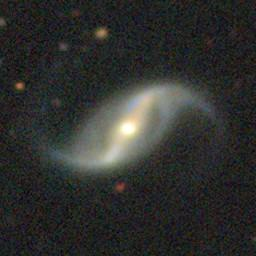

In [ ]:
print("barred_spiral_galaxies")
PIL.Image.open(str(barred_spiral_galaxies_list[13]))

cigar_shaped_smooth_galaxies


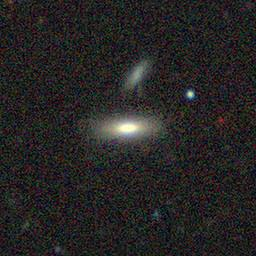

In [ ]:
print("cigar_shaped_smooth_galaxies")
PIL.Image.open(str(cigar_shaped_smooth_galaxies_list[23]))

disturbed_galaxies


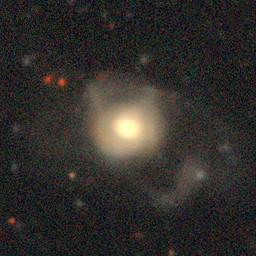

In [ ]:
print("disturbed_galaxies")
PIL.Image.open(str(disturbed_galaxies_list[33]))

edge_on_galaxies_with_bulge


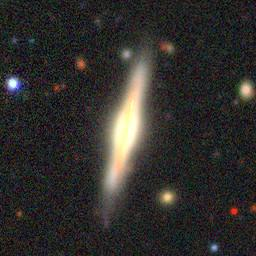

In [ ]:
print("edge_on_galaxies_with_bulge")
PIL.Image.open(str(edge_on_galaxies_with_bulge_list[43]))

edge_on_galaxies_without_bulge


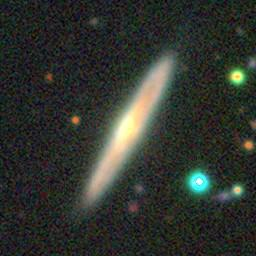

In [ ]:
print("edge_on_galaxies_without_bulge")
PIL.Image.open(str(edge_on_galaxies_without_bulge_list[53]))

in_between_round_smooth_galaxies


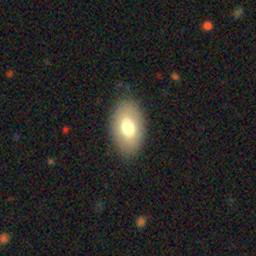

In [ ]:
print("in_between_round_smooth_galaxies")
PIL.Image.open(str(in_between_round_smooth_galaxies_list[63]))

merging_galaxies


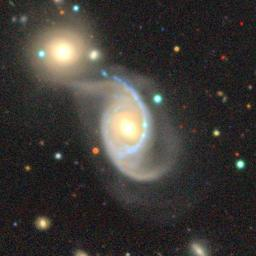

In [ ]:
print("merging_galaxies")
PIL.Image.open(str(merging_galaxies_list[73]))

round_smooth_galaxies


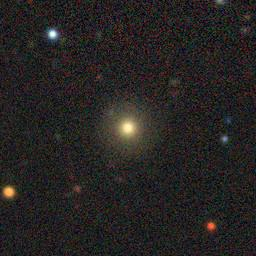

In [ ]:
print("round_smooth_galaxies")
PIL.Image.open(str(round_smooth_galaxies_list[83]))


unbarred_loose_spiral_galaxies


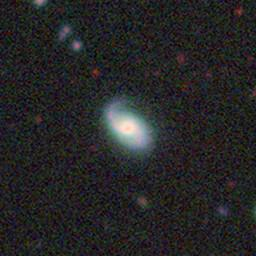

In [ ]:
print("unbarred_loose_spiral_galaxies")
PIL.Image.open(str(unbarred_loose_spiral_galaxies_list[93]))


unbarred_tight_spiral_galaxies


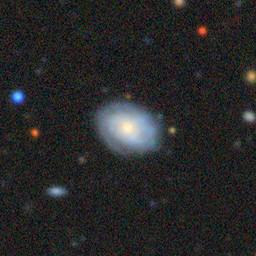

In [ ]:
print("unbarred_tight_spiral_galaxies")
PIL.Image.open(str(unbarred_tight_spiral_galaxies_list[103]))

# Class Dictionaries

# Class Labels as per AstroNN Dataset

In [ ]:
class_names = {
    0: "Disturbed Galaxies",
    1: "Merging Galaxies",
    2: "Round Smooth Galaxies",
    3: "In-between Round Smooth Galaxies",
    4: "Cigar Shaped Smooth Galaxies",
    5: "Barred Spiral Galaxies",
    6: "Unbarred Tight Spiral Galaxies",
    7: "Unbarred Loose Spiral Galaxies",
    8: "Edge-on Galaxies without Bulge",
    9: "Edge-on Galaxies with Bulge"
}

# Creating Class Image Paths Dictionary and Class Labels Dictionary

In [ ]:
galaxy_classes_image_paths_dict = {
    "Disturbed_Galaxies" : disturbed_galaxies_list,
    "Merging_Galaxies" : merging_galaxies_list,
    "Round_Smooth_Galaxies" : round_smooth_galaxies_list,
    "In_Between_Round_Smooth_Galaxies" : in_between_round_smooth_galaxies_list,
    "Cigar_Shaped_Smooth_Galaxies" : cigar_shaped_smooth_galaxies_list,
    "Barred_Spiral_Galaxies" : barred_spiral_galaxies_list,
    "Unbarred_Tight_Spiral_Galaxies" : unbarred_tight_spiral_galaxies_list,
    "Unbarred_Loose_Spiral_Galaxies" : unbarred_loose_spiral_galaxies_list,
    "Edge_On_Galaxies_Without_Bulge" : edge_on_galaxies_without_bulge_list,
    "Edge_On_Galaxies_With_Bulge" : edge_on_galaxies_with_bulge_list
}

In [ ]:
galaxy_image_labels_dict = {
    "Disturbed_Galaxies" : 0,
    "Merging_Galaxies" : 1,
    "Round_Smooth_Galaxies" : 2,
    "In_Between_Round_Smooth_Galaxies" : 3,
    "Cigar_Shaped_Smooth_Galaxies" : 4,
    "Barred_Spiral_Galaxies" : 5,
    "Unbarred_Tight_Spiral_Galaxies" : 6,
    "Unbarred_Loose_Spiral_Galaxies" : 7,
    "Edge_On_Galaxies_Without_Bulge" : 8,
    "Edge_On_Galaxies_With_Bulge" : 9
}

# Using the created dictionaries

In [ ]:
galaxy_classes_image_paths_dict["Round_Smooth_Galaxies"][17]

PosixPath('/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Round_Smooth_Galaxies/image_4942_2.jpg')

In [ ]:
str(galaxy_classes_image_paths_dict["Round_Smooth_Galaxies"][17])

'/content/drive/MyDrive/galaxy_morphology_classification/Datasets/galaxy_morphology_dataset_without_split/Round_Smooth_Galaxies/image_4942_2.jpg'

Round_Smooth_Galaxies


array([[[45, 35, 28],
        [40, 31, 27],
        [39, 30, 27],
        ...,
        [13,  4,  0],
        [46, 37, 28],
        [49, 40, 27]],

       [[28, 20, 13],
        [39, 30, 26],
        [45, 38, 35],
        ...,
        [28, 21, 18],
        [54, 44, 37],
        [37, 28, 18]],

       [[26, 20, 13],
        [41, 37, 32],
        [54, 49, 46],
        ...,
        [37, 31, 32],
        [55, 46, 43],
        [36, 27, 23]],

       ...,

       [[59, 50, 46],
        [57, 48, 44],
        [48, 42, 37],
        ...,
        [44, 44, 50],
        [35, 35, 41],
        [28, 31, 35]],

       [[47, 39, 32],
        [45, 37, 30],
        [43, 37, 30],
        ...,
        [30, 33, 38],
        [33, 37, 38],
        [25, 30, 31]],

       [[40, 33, 24],
        [40, 33, 24],
        [46, 40, 33],
        ...,
        [15, 18, 22],
        [34, 39, 40],
        [43, 49, 48]]], dtype=uint8)
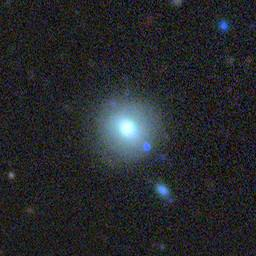

In [ ]:
print("Round_Smooth_Galaxies")
round_smooth_galaxies_img = cv2.imread(str(galaxy_classes_image_paths_dict["Round_Smooth_Galaxies"][17]))
round_smooth_galaxies_img

In [ ]:
print(round_smooth_galaxies_img.shape)

(256, 256, 3)


In [ ]:
cv2.resize(round_smooth_galaxies_img, (224, 224)).shape

(224, 224, 3)

# Class Distribution Graph

# Checking the number of samples in each class of the Galaxy Image dataset

In [ ]:
for galaxy_class, galaxy_images_paths_list in galaxy_classes_image_paths_dict.items():
    print(galaxy_class)
    print(len(galaxy_images_paths_list))

Disturbed_Galaxies
1081
Merging_Galaxies
1853
Round_Smooth_Galaxies
2645
In_Between_Round_Smooth_Galaxies
2027
Cigar_Shaped_Smooth_Galaxies
334
Barred_Spiral_Galaxies
2043
Unbarred_Tight_Spiral_Galaxies
1829
Unbarred_Loose_Spiral_Galaxies
2628
Edge_On_Galaxies_Without_Bulge
1423
Edge_On_Galaxies_With_Bulge
1873


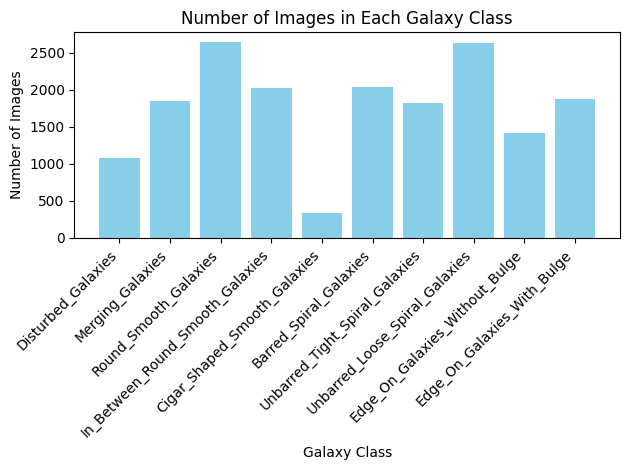

In [ ]:
import matplotlib.pyplot as plt

galaxy_image_classes = ['Disturbed_Galaxies', 'Merging_Galaxies', 'Round_Smooth_Galaxies', 'In_Between_Round_Smooth_Galaxies', 'Cigar_Shaped_Smooth_Galaxies', 'Barred_Spiral_Galaxies', 'Unbarred_Tight_Spiral_Galaxies', 'Unbarred_Loose_Spiral_Galaxies', 'Edge_On_Galaxies_Without_Bulge', 'Edge_On_Galaxies_With_Bulge']
galaxy_image_counts = [1081, 1853, 2645, 2027, 334, 2043, 1829, 2628, 1423, 1873]

# Plotting the bar chart
plt.bar(galaxy_image_classes, galaxy_image_counts, color='skyblue')
plt.xlabel('Galaxy Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Galaxy Class')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.tight_layout()

# Showing the plot
plt.show()

# Dataset Preprocessing For Training CNN Model (No need to execute this as we'll be using flow_from_directory function from ImageDataGenerator to process the data to make it suitable for training the CNN model)

# Creating the Images array and Labels array for training the model

In [ ]:
X, y = [], []

for galaxy_class, galaxy_images_paths_list in galaxy_classes_image_paths_dict.items():
    for image_path in galaxy_images_paths_list:
        img = cv2.imread(str(image_path))
        try:
          resized_img = cv2.resize(img, (224, 224))
          X.append(resized_img)
          y.append(galaxy_image_labels_dict[galaxy_class])
        except:
          continue

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(17736, 224, 224, 3)

In [ ]:
y.shape

(17736,)

# Splitting the dataset (80 % - Train set, 20 % - Test set) (No need to execute this as we'll be using flow_from_directory function from ImageDataGenerator to process the data to make it suitable for training the CNN model)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Checking the size of Training & Testing sets (No need to execute this as we'll be using flow_from_directory function from ImageDataGenerator to process the data to make it suitable for training the CNN model)

In [ ]:
len(X_train)

14188

In [ ]:
len(X_test)

3548

array([[[ 33,  28,  29],
        [ 30,  25,  26],
        [ 25,  20,  22],
        ...,
        [ 34,  36,  24],
        [ 41,  42,  29],
        [ 39,  39,  25]],

       [[ 30,  26,  26],
        [ 31,  26,  27],
        [ 29,  25,  26],
        ...,
        [ 36,  38,  27],
        [ 40,  41,  29],
        [ 36,  36,  23]],

       [[ 28,  26,  26],
        [ 32,  30,  30],
        [ 32,  30,  30],
        ...,
        [ 39,  39,  31],
        [ 41,  42,  32],
        [ 37,  38,  28]],

       ...,

       [[ 56,  61, 161],
        [ 57,  64, 158],
        [ 60,  67, 153],
        ...,
        [ 50,  57,  54],
        [ 53,  57,  54],
        [ 54,  58,  53]],

       [[ 56,  62, 165],
        [ 58,  63, 163],
        [ 60,  67, 158],
        ...,
        [ 44,  51,  47],
        [ 50,  55,  50],
        [ 54,  58,  53]],

       [[ 62,  67, 172],
        [ 61,  69, 169],
        [ 64,  70, 163],
        ...,
        [ 51,  59,  55],
        [ 59,  64,  59],
        [ 65,  69,  64]]], dtype=uint8)
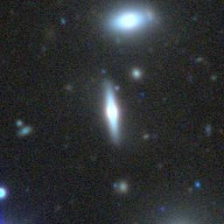

In [ ]:
X_train[1]

# Scaling the numpy arrays representing the images in the training & testing dataset (Just divide X_train & X_test by 255, after that all the values that you would have in the arrays would be between 0 to 1 & not 0 to 255 as they were before scaling) (No need to execute this as we'll be using flow_from_directory function from ImageDataGenerator to process the data to make it suitable for training the CNN model)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled[1].shape

(180, 180, 3)

In [ ]:
X_test_scaled[1].shape

(180, 180, 3)

<hr>
<hr>
<hr>
<hr>

# ResNet50

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second convolutional layer
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same', activation=None)(x)
    x = layers.BatchNormalization()(x)

    # Adjust the shortcut path if necessary
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same', activation=None)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add the shortcut to the output
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

def build_resnet50(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Initial convolutional layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x = layers.Conv2D(32, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual blocks
    for _ in range(3):
        x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, stride=2)
    for _ in range(3):
        x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, stride=2)
    for _ in range(5):
        x = residual_block(x, filters=256)

    x = residual_block(x, filters=512, stride=2)
    for _ in range(2):
        x = residual_block(x, filters=512)

    # Global average pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Output layer
    outputs = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs, outputs)

    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 10

# Build ResNet50 model
model = build_resnet50(input_shape, num_classes)

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 32)         4736      ['input_1[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 112, 112, 32)         128       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)           0         ['batch_normalization_1[0]

In [9]:
# Directories for the dataset
train_dir = '/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/train'
validation_dir = '/content/drive/MyDrive/galaxy_type_classification_with_ViT_and_CNN/galaxy_morphology_dataset_balanced_splitted/test'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Compile the model
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

Found 2680 images belonging to 10 classes.
Found 536 images belonging to 10 classes.


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping

In [11]:
callbacks = [
  EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=False), # If the validation loss doesn't decreases for continuous 50 epoch, this will stop the training
]

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator
)

Epoch 1/200
84/84 [==============================] - 123s 1s/step - loss: 2.2515 - accuracy: 0.2392 - val_loss: 3.8918 - val_accuracy: 0.1772
Epoch 2/200
84/84 [==============================] - 110s 1s/step - loss: 1.7779 - accuracy: 0.3593 - val_loss: 2.9343 - val_accuracy: 0.0746
Epoch 3/200
84/84 [==============================] - 110s 1s/step - loss: 1.5588 - accuracy: 0.4343 - val_loss: 2.3194 - val_accuracy: 0.2071
Epoch 4/200
84/84 [==============================] - 110s 1s/step - loss: 1.3946 - accuracy: 0.4918 - val_loss: 2.1292 - val_accuracy: 0.3340
Epoch 5/200
84/84 [==============================] - 109s 1s/step - loss: 1.3659 - accuracy: 0.5194 - val_loss: 3.2894 - val_accuracy: 0.2388
Epoch 6/200
84/84 [==============================] - 109s 1s/step - loss: 1.3203 - accuracy: 0.5295 - val_loss: 4.5508 - val_accuracy: 0.1493
Epoch 7/200
84/84 [==============================] - 109s 1s/step - loss: 1.2311 - accuracy: 0.5604 - val_loss: 4.3112 - val_accuracy: 0.1978
Epoch 

# Improved CNN model architecture


# High training accuracy & low testing accuracy -> High Variance -> Underfitting
# High testing accuracy & low training accuracy -> High Bias -> Overfitting
# Good Balance -> Low Bias & Low Variance

# Prediction for unseen images using the trained model

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model from an HDF5 file
model = load_model('/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Trained_models/CNN_models/CNN_model_ResNet50_Output_function_update_268_dataset.h5')

# To check if the model is loaded correctly, you can print a summary
model.summary()


TypeError: <class 'keras.src.losses.losses.CategoricalCrossentropy'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.losses', 'class_name': 'CategoricalCrossentropy', 'config': {'reduction': 'auto', 'name': 'categorical_crossentropy', 'from_logits': False, 'label_smoothing': 0.0, 'axis': -1, 'fn': 'categorical_crossentropy'}, 'registered_name': None}.

Exception encountered: CategoricalCrossentropy.__init__() got an unexpected keyword argument 'fn'

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import CategoricalCrossentropy

# Load the model without the original loss function
model = load_model('/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Trained_models/CNN_models/CNN_model_ResNet50_Output_function_update_268_dataset.h5', compile=False)

# Recompile the model with a compatible loss function
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Print the model summary to confirm
model.summary()


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 112, 112, 32)   │          4,736 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 112, 112, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 64)     │          2,112 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 56, 56, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
│                           │                        │                │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 56, 56, 64)     │            256 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 56, 56, 64)     │            256 │ conv2d_6[0][0]         │
│ (BatchNormalization) 

 Total params: 21,294,410 (81.23 MB)

 Trainable params: 21,277,322 (81.17 MB)

 Non-trainable params: 17,088 (66.75 KB)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Load the pre-trained and saved model from an HDF5 file
model = load_model('/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Trained_models/CNN_models/CNN_model_ResNet50_250_268_dataset.h5', compile=False)

# Define the mapping of class indices to galaxy types
class_names = {
    0: "Disturbed_Galaxies",
    1: "Merging_Galaxies",
    2: "Round_Smooth_Galaxies",
    3: "In_Between_Round_Smooth_Galaxies",
    4: "Cigar_Shaped_Smooth_Galaxies",
    5: "Barred_Spiral_Galaxies",
    6: "Unbarred_Tight_Spiral_Galaxies",
    7: "Unbarred_Loose_Spiral_Galaxies",
    8: "Edge_On_Galaxies_Without_Bulge",
    9: "Edge_On_Galaxies_With_Bulge"
}

# Upload an image using Google Colab's file upload utility
uploaded_files = files.upload()

# Process and predict for each uploaded image
for path in uploaded_files.keys():
    # Load and preprocess the image
    input_image = image.load_img(path, target_size=(224, 224))  # Adjust target_size as per your model's input size
    image_values = image.img_to_array(input_image)             # Convert to a numpy array
    dimension_corrected = np.expand_dims(image_values, axis=0) # Add batch dimension
    dimension_corrected = dimension_corrected / 255.0          # Normalize the image

    # Perform prediction
    prediction = model.predict(dimension_corrected)
    argmax_value = np.argmax(prediction)                       # Get the index of the highest probability
    predicted_class = class_names[argmax_value]               # Map to the corresponding class name

    # Print the result
    print(f"Image: {path}")
    print(f"Predicted Class: {predicted_class}")




Saving image_9585_5.jpg to image_9585_5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: image_9585_5.jpg
Predicted Class: Disturbed_Galaxies


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

uploaded_files = files.upload()

for path in uploaded_files.keys():
  input_image = image.load_img(path, target_size = (224, 224))
  image_values = image.img_to_array(input_image)
  dimension_corrected = np.expand_dims(image_values, axis = 0)
  prediction = model.predict(dimension_corrected)
  argmax_value = np.argmax(prediction)
  print(argmax_value)

Saving image_7875_4.jpg to image_7875_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
tf.saved_model.load(vit_model_path).signatures.keys()




KeysView(_SignatureMap({'serving_default': <ConcreteFunction (*, input_2: TensorSpec(shape=(None, 64, 1875), dtype=tf.float32, name='input_2')) -> Dict[['dense_27', TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_27')]] at 0x78BBA02C2590>}))

In [ ]:
training_data.class_indices

NameError: name 'training_data' is not defined

In [ ]:
import gradio as gr
import cv2

# Gradio Interface

def predict(image, text):
    img_path = image.name
    img = cv2.imread(img_path)
    prediction = "Predicted Label"
    output_list = [img, prediction]
    return output_list

def main():
    model_list = ["Convolutional Neural Network", "Vision Transformer"]

    io = gr.Interface(
        fn=predict,
        inputs=[gr.File(label = "Upload an image of a Galaxy", file_types=["image"]),
                gr.Dropdown(label="Select Model", choices=model_list)],
        outputs=[gr.Image(label="Uploaded Image", width=400, height=400),
                 gr.Textbox(label="Chosen Model's Prediction")],
        allow_flagging="manual",
        flagging_options=["Save"],
        title="Classification of Galaxy Images using Convolutional Neural Network and Vision Transformer",
        description="Predict the Type of Galaxy based on its Morphology using Image Classification with CNN and Vision Transformer",
        theme=gr.themes.Soft()
    )
    io.launch(share=True)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/gradio/interface.py:399: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9484336037ab890804.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
training_data.class_indices.keys()

NameError: name 'training_data' is not defined

In [ ]:
training_data.class_indices.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Loss & Accuracy graphs for the trained model

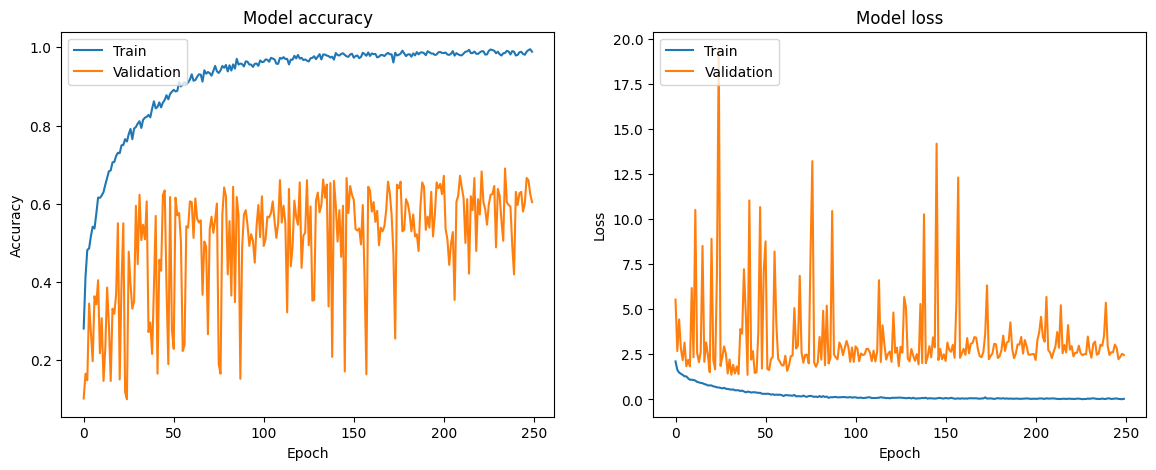

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Confusion Matrix for the trained model

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step


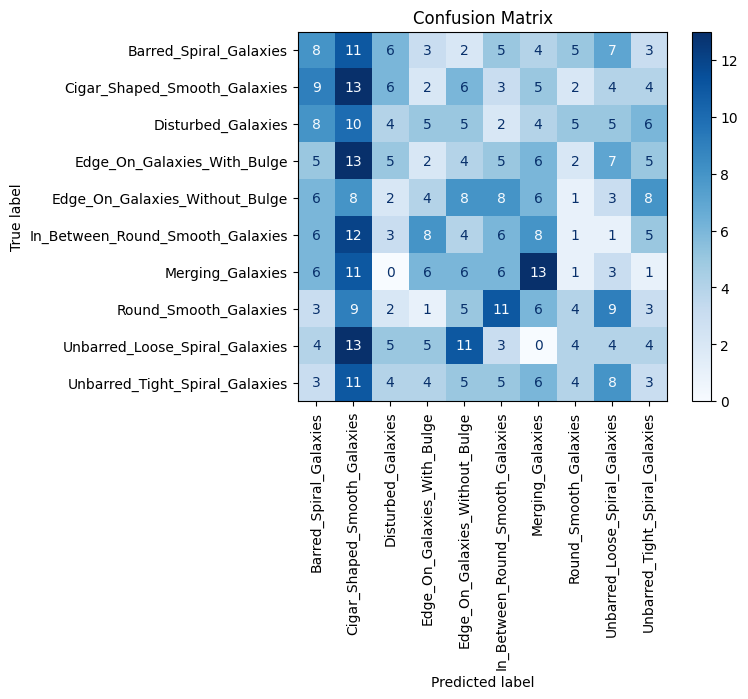

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the true labels from the validation generator
true_labels = validation_generator.classes

# Get class labels mapping
class_labels = list(validation_generator.class_indices.keys())

# Predict probabilities for the validation dataset
predicted_probabilities = model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Define the path to your desired folder in Google Drive
save_model_folder = '/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Trained_models/CNN_models/'


In [ ]:
#Save the model
model.save(save_model_folder + 'CNN_model_ResNet50_250_268_dataset.h5')


In [ ]:
from tensorflow.keras.models import load_model

saved_model_path = "/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Trained_models/CNN_models/CNN_model_ResNet50_Output_function_update_268_dataset.h5"

# Load the model
loaded_model = load_model(saved_model_path)

In [ ]:
predictions = model.predict(testing_data)
predictions

13/13 [==============================] - 1s 83ms/step


array([[9.0237946e-04, 4.4880861e-05, 8.8829798e-01, ..., 1.5208605e-04,
        2.1511119e-02, 2.4465061e-04],
       [1.0838206e-02, 3.3709366e-04, 6.6921864e-05, ..., 1.6072156e-05,
        2.1685331e-01, 7.6388991e-01],
       [1.8785788e-02, 4.5655590e-05, 3.0436553e-04, ..., 2.1089729e-05,
        2.1749274e-03, 9.7201084e-04],
       ...,
       [4.5196049e-02, 3.2157671e-02, 2.4518268e-02, ..., 6.0062581e-03,
        4.2847964e-01, 3.7647670e-03],
       [5.5402647e-06, 1.4002965e-09, 2.9028575e-07, ..., 2.8314540e-11,
        7.0245942e-10, 2.1436502e-11],
       [5.1244313e-04, 1.9560426e-07, 4.4411527e-06, ..., 3.0529300e-08,
        3.9714373e-06, 2.0031976e-06]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[24])
score

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.0906653 , 0.08995415, 0.10286581, 0.08840892, 0.1831655 ,
       0.08823018, 0.08975102, 0.08811183, 0.0891718 , 0.08967547],
      dtype=float32)>

In [ ]:
np.argmax(score)

4

# Fetching a batch from the testing_data generator and predicting the label of that image from this batch.

In [ ]:
images, labels = next(testing_data) # This line fetches the next batch of images and labels from the testing_data generator.

In [ ]:
images.shape

In [ ]:
labels.shape

# Select the first image and its corresponding label from the batch.

In [ ]:
image = images[0]
label = labels[0]

# When your labels are one-hot encoded (common in classification problems), "class_index = np.argmax(label)" :  this line converts the one-hot encoded label to a single class index.

In [ ]:
label

In [ ]:
class_index = np.argmax(label)

In [ ]:
class_index

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(image[:, :, ::-1])  # Reversing the order (BGR to RGB) for display
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

# Taking inputs from the user for grabbing an image from a batch of test dataset & then printing the predicted and actual labels of that grabbed image along with displaying the image

In [ ]:
input_test_image = int(input("Enter a number between 0 and 16 (excluding 16), this number represents which sample image you want to pick from the test dataset : "))

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Fetch a batch of images and labels from the testing_data generator
images, labels = next(testing_data)

# Get the model's prediction for the input_test_image
predictions = model.predict(images)  # Predict for the whole batch

# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = np.argmax(labels[input_test_image])

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in testing_data.class_indices.items() if index == predicted_index]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in testing_data.class_indices.items() if index == actual_index]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")
print(f"Actual Class Name: {actual_class_name}")

# Displaying the BGR image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turning off axis labels and ticks
plt.show()


In [ ]:
type(predicted_class_name)

In [ ]:
predicted_class_name[0]

In [ ]:
actual_class_name[0]

<hr>
<hr>
<hr>

## Dropout Regularization : It is a stochastic regularization technique, therefore it can be used anywhere in the neural network. Some neurons in the layer where dropout regularization is applied shut down. It is used to deal with overfitting. The value that is mostly used in Dropout layers is 0.5

## Data Augmentation is data transformation and not addition of data to the dataset

## Data Augmentation helps the model learn better as it improves the quality of the data

## Dropout regularization is not needed when we are working with augmented data

## Data augmentation eliminates the need of doing Regularization

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
dataset_dir = "/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Datasets/galaxy_morphology_dataset_splitted_268"

import pathlib
dataset_dir = pathlib.Path(dataset_dir)

In [ ]:
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0 / 255.0,
    validation_split = 0.2,
    # Data Augmentation
    rotation_range = 20,
		zoom_range = 0.15,
		width_shift_range = 0.2,
		height_shift_range = 0.2,
		shear_range = 0.15, # Bending the image
		horizontal_flip = True,
		fill_mode = "nearest"
)

In [ ]:
batch_size = 16

In [ ]:
training_data = data_generator.flow_from_directory(
    dataset_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    subset = 'training'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Rishabh_Galaxy_Classification_Project/Datasets/galaxy_morphology_dataset_splitted_268'

In [ ]:
testing_data = data_generator.flow_from_directory(
    dataset_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    subset = 'validation'
)

Found 54 images belonging to 3 classes.


In [ ]:
training_steps = training_data.samples // batch_size
testing_steps = testing_data.samples // batch_size

In [ ]:
model_with_augmentation_and_dropout = Sequential([
    layers.Conv2D(
        64,
        (3,3),
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(
        64,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),
    layers.Conv2D(
        64,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation = 'softmax') # as we have 3 classes, therefor number of neurons in this output dense layer is 3
])

In [ ]:
model_with_augmentation_and_dropout.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model_with_augmentation_and_dropout.fit(
    training_data,
    validation_data = testing_data,
    epochs = 25,
    steps_per_epoch = training_steps,
    validation_steps = testing_steps
)

Epoch 1/25
13/13 [==============================] - 106s 8s/step - loss: 4.4202 - accuracy: 0.3627 - val_loss: 1.0999 - val_accuracy: 0.3750
Epoch 2/25
13/13 [==============================] - 6s 434ms/step - loss: 1.1035 - accuracy: 0.3606 - val_loss: 1.0980 - val_accuracy: 0.3750
Epoch 3/25
13/13 [==============================] - 6s 502ms/step - loss: 1.0965 - accuracy: 0.4069 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/25
13/13 [==============================] - 5s 392ms/step - loss: 1.0881 - accuracy: 0.3971 - val_loss: 1.0799 - val_accuracy: 0.5833
Epoch 5/25
13/13 [==============================] - 6s 491ms/step - loss: 1.0494 - accuracy: 0.4265 - val_loss: 1.0316 - val_accuracy: 0.5417
Epoch 6/25
13/13 [==============================] - 6s 481ms/step - loss: 0.9690 - accuracy: 0.4902 - val_loss: 0.9415 - val_accuracy: 0.5833
Epoch 7/25
13/13 [==============================] - 6s 486ms/step - loss: 0.9183 - accuracy: 0.5625 - val_loss: 0.9772 - val_accuracy: 0.4583
Epoch 8

In [ ]:
model_with_only_augmentation = Sequential([
    layers.Conv2D(
        512,
        (3,3),
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        256,
        (3,3),
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        128,
        (3,3),
        activation = 'relu',
        input_shape = (224, 224, 3)
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        128,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(
        64,
        (3,3),
        activation = 'relu',
    ),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(3, activation = 'softmax') # as we have 3 classes, therefor number of neurons in this output dense layer is 3
])

In [ ]:
model_with_only_augmentation.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [ ]:
history = model_with_only_augmentation.fit(
    training_data,
    validation_data = testing_data,
    epochs = 100,
    steps_per_epoch = training_steps,
    validation_steps = testing_steps
)

Epoch 1/100
13/13 [==============================] - 6s 472ms/step - loss: 0.9985 - accuracy: 0.5245 - val_loss: 0.9655 - val_accuracy: 0.5417
Epoch 2/100
13/13 [==============================] - 6s 446ms/step - loss: 0.9985 - accuracy: 0.4608 - val_loss: 0.9896 - val_accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 8s 622ms/step - loss: 0.9972 - accuracy: 0.4808 - val_loss: 0.9412 - val_accuracy: 0.5208
Epoch 4/100
13/13 [==============================] - 6s 444ms/step - loss: 0.9689 - accuracy: 0.5245 - val_loss: 0.9549 - val_accuracy: 0.5417
Epoch 5/100
13/13 [==============================] - 6s 436ms/step - loss: 0.9986 - accuracy: 0.4902 - val_loss: 1.0268 - val_accuracy: 0.4583
Epoch 6/100
13/13 [==============================] - 7s 572ms/step - loss: 0.9977 - accuracy: 0.5049 - val_loss: 0.9586 - val_accuracy: 0.5417
Epoch 7/100
13/13 [==============================] - 6s 436ms/step - loss: 0.9340 - accuracy: 0.5529 - val_loss: 0.9170 - val_accuracy: 0.5417

# Training the CNN Model

In [ ]:
num_classes = 3

model = Sequential([
  # usually we put multiple convolutional & maxpooling layers first
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 filters of size 3*3, the activation function we use usually is relu
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'), # 32 filters of size 3*3
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'), # 64 filters of size 3*3
  layers.MaxPooling2D(),
  # till this point we will have a 2D array
  # Before the dense layer we should always flatten the input that would go into the Dense layer
  layers.Flatten(), # converts the 2D array into 1D array
  # We always put a dense layer after adding all the convolutional layers
  # The dense layer only accepts a 1D array
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) # there would be 3 neurons in the last layer so if the first neuron is activated we would know that the predicted class is 'healthy' & similarly the activation of any of the other 2 neurons would indicate the class being 'kwashiorkor' or 'marasmus'
  # the number of neurons in the last layer which is a dense layer is always equal to the number of classes & the activation of different neurons from the last layer indicate different classes for the input provided
  # activation function being used here is linear, we can even use some other function
  # We can use the softmax function as the activation function for this last Dense layer which gives the predictions / outputs
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # SparseCategoricalCrossentropy is being used as the final vector indicates a category / class to which the input belongs & it is not a one hot encoded value

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
7/7 [==============================] - 7s 240ms/step - loss: 2.1920 - accuracy: 0.3018 - val_loss: 1.0927 - val_accuracy: 0.3036
Epoch 2/100
7/7 [==============================] - 0s 36ms/step - loss: 1.0838 - accuracy: 0.3423 - val_loss: 1.0784 - val_accuracy: 0.3571
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 1.0026 - accuracy: 0.5811 - val_loss: 1.0173 - val_accuracy: 0.4643
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 0.8490 - accuracy: 0.5721 - val_loss: 0.9818 - val_accuracy: 0.4821
Epoch 5/100
7/7 [==============================] - 0s 30ms/step - loss: 0.7392 - accuracy: 0.6532 - val_loss: 1.0919 - val_accuracy: 0.5179
Epoch 6/100
7/7 [==============================] - 0s 28ms/step - loss: 0.7479 - accuracy: 0.6396 - val_loss: 0.9329 - val_accuracy: 0.5179
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.7135 - accuracy: 0.6486 - val_loss: 0.8631 - val_accuracy: 0.5714
Epoch 8/100
7/7 [==

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

2/2 [==============================] - 0s 9ms/step


array([[-9.61166191e+00, -1.70440829e+00,  1.74188557e+01],
       [-2.21956387e+01,  1.81648579e+01,  1.07585716e+01],
       [-4.47349644e+00, -2.43838477e+00,  3.28835654e+00],
       [ 4.32147503e+00, -3.23691225e+00, -6.75953817e+00],
       [ 7.91954088e+00, -8.19086647e+00, -9.04428959e+00],
       [-1.34119768e+01,  1.25288506e+01,  2.46480203e+00],
       [-1.00249434e+01,  4.32865572e+00,  1.10186357e+01],
       [-1.27152538e+00,  1.10864460e+00, -3.46845031e+00],
       [-1.48723249e+01,  1.26133471e+01,  5.07152176e+00],
       [-3.60285020e+00,  5.92581224e+00, -5.64688969e+00],
       [ 6.89373732e+00, -9.37435532e+00, -1.25544205e-01],
       [ 8.15357399e+00, -8.50076675e+00, -8.00565910e+00],
       [-1.25633259e+01,  1.44197063e+01, -8.35571885e-01],
       [-5.28601885e+00,  4.51244116e+00,  4.16638613e+00],
       [-8.95062351e+00,  7.10710669e+00, -3.86330676e+00],
       [-6.59515190e+00,  4.67045546e+00,  6.85339332e-01],
       [ 1.17245293e+01, -1.52553740e+01

# Checking the class of the 25th sample in the test dataset

In [ ]:
score = tf.nn.softmax(predictions[24])
score

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2.1908997e-11, 9.9999702e-01, 3.0061810e-06], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[24]

1

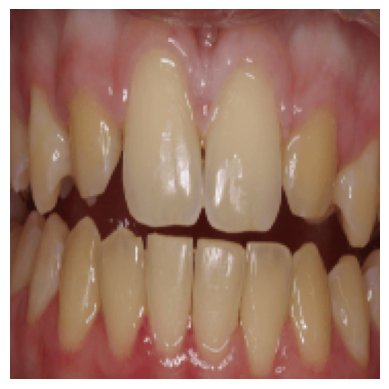

In [ ]:
# Displaying the BGR image using Matplotlib
plt.imshow(X_test_scaled[24][:, :, ::-1])  # Reversing the order (BGR to RGB) for display
plt.axis('off')  # Turning off axis labels and ticks
plt.show()

# The test dataset contains 56 images numbered with numbers from 0 to 55

In [ ]:
input_test_image = int(input("Enter a number between 0 and 52 (excluding 52), this number represents which sample image you want to pick from the test dataset : "))

Enter a number between 0 and 52 (excluding 52), this number represents which sample image you want to pick from the test dataset : 33


Predicted Index: 1
Actual Index: 1
Predicted Class Name: moderate_erosion


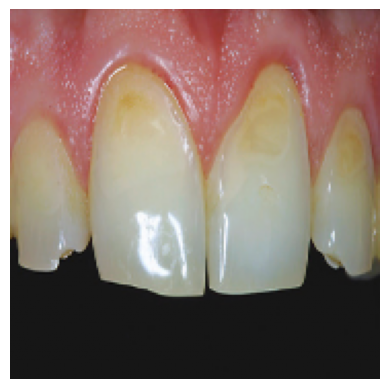

In [ ]:
# Get the predicted class index
predicted_index = np.argmax(tf.nn.softmax(predictions[input_test_image]))

# Get the actual index of the test image
actual_index = y_test[input_test_image]

# Display the class name for the predicted index using the dictionary
predicted_class_name = [name for name, index in erosion_stage_labels_dict.items() if index == predicted_index][0]

# Display the class name for the actual index using the dictionary
actual_class_name = [name for name, index in erosion_stage_labels_dict.items() if index == actual_index][0]

# Display the actual index, predicted class name, and image
print(f"Predicted Index: {predicted_index}")
print(f"Actual Index: {actual_index}")
print(f"Predicted Class Name: {predicted_class_name}")

# Display the BGR image using Matplotlib
plt.imshow(X_test_scaled[input_test_image][:, :, ::-1])  # Reverse the order (BGR to RGB) for display
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


# Using the saved model after loading it to make predictions on unseen image

# Downloading an image from google to test the model

In [ ]:
!pip install requests

In [ ]:
import requests
from google.colab import drive

# URL of the image to download
image_url = 'https://dentagama.com/showimage.aspx?img=071115033936ToothErosion.png&w=300&h=300'

# Define the path to your desired folder in Google Drive
image_path = '/content/drive/MyDrive/Projects/Enamel_Erosion_Classification/Test_Images/'

# Send a GET request to download the image
response = requests.get(image_url)

# Save the image to your Google Drive folder
with open(image_path + 'severely_eroded_teeth_image.jpg', 'wb') as f:
    f.write(response.content)


# Use the loaded model to predict the class of the image downloaded from the internet

In [ ]:
# Load and preprocess the new image
unseen_test_image_path = "/content/drive/MyDrive/Projects/Enamel_Erosion_Classification/Test_Images/severely_eroded_teeth_image.jpg"
new_image = tf.keras.preprocessing.image.load_img(unseen_test_image_path, target_size=(180, 180))
new_image_array = tf.keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_scaled = new_image_array / 255.0

# Make predictions using the loaded model
predictions = loaded_model.predict(new_image_scaled)

# Convert predictions to class labels using argmax
predicted_class = np.argmax(predictions)

# Display the predicted class
for class_name, class_label in erosion_stage_labels_dict.items():
    if class_label == predicted_class:
        print(f"Predicted Class: {class_name}")

1/1 [==============================] - 0s 263ms/step
Predicted Class: severe_erosion


# Displaying the downloaded image for which the class was predicted using the created CNN model

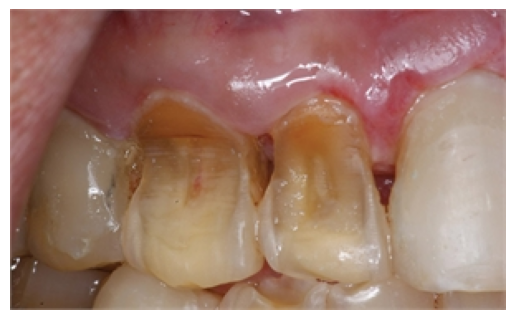

In [ ]:
import matplotlib.image as mpimg

# Providing the path of the downloaded image file stored in Google Drive
image_path = '/content/drive/MyDrive/Projects/Enamel_Erosion_Classification/Test_Images/severely_eroded_teeth_image.jpg'  # Replace with your image path

# Reading the image using Matplotlib
img = mpimg.imread(image_path)

# Displaying the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


<hr>
<hr>

## Getting 100 % accuracy on test data indicates that the model has overfitted, even a 99 % accuracy indicates overfitting to some extent, so we should aim for a 97 - 98 % accuracy

### Ways to improve the accuracy : The gap between the training & testing accuracies for a model shouldn't be large, it should be close.

1. Adding more Dense layers as Hidden layers as mentioned below:     
  layers.Dense(128, activation='relu'),

  layers.Dense(64, activation='relu'),

  layers.Dense(32, activation='relu')

2. Increasing the number of epochs
3. Dropout Regularization by adding more dropout layers with 0.5 as the passed parameter
4. Increase the size of the neural network by adding more layers
5. Early Stopping, we can even do it manually by stopping at a particular epoch by observing in which epoch, we are getting higher accuracy

<hr>
<hr>